In [1]:
import pandas as pd
import matplotlib.pyplot as plt

result_dir = "../output/density/result.csv"

In [2]:
df = pd.read_csv(result_dir,header=None)
df.columns = ['dataset','algo','volume density','degree density']
print(df)

     dataset algo  volume density  degree density
0        syn  nbr         4.44444         2.66667
1        syn  deg         4.20000         2.60000
2      enron  nbr        42.42110        10.73030
3      enron  deg        20.16670        37.66670
4      bin_1  nbr        43.14000        18.76000
5      bin_1  deg        43.14000        18.76000
6      bin_2  nbr       225.29200        99.39200
7      bin_2  deg       225.29200        99.39200
8      bin_4  nbr        31.90000        19.14000
9      bin_4  deg        31.90000        19.14000
10     bin_5  nbr       164.12800        99.54000
11     bin_5  deg       164.12800        99.54000
12     enron  nbr        42.42110        10.73030
13     enron  deg        20.16670        37.66670
14   contact  nbr        70.94000       129.81500
15   contact  deg        70.12940       132.50700
16       syn  nbr         4.44444         2.66667
17       syn  deg         4.20000         2.60000
18     enron  nbr        42.42110        10.73030


In [3]:
fontsize = 28
labelsize = 20
good_name_algo = {
    'nbr' : "vol-densest subhyp.", 
    'deg': "deg-densest subhyp."
}

good_name_dataset = {
    'bin_2': 'bin4U',
    'bin_5': 'bin3U', 
    'pref': 'pref3U', 
    "enron" : "enron",
    "congress" : "congress",
    "contact" : "contact",
    "dblp": "dblp",
    'aminer': 'aminer'
}


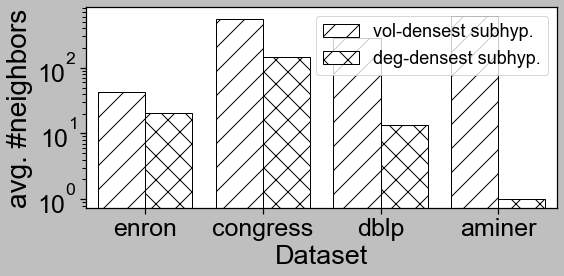

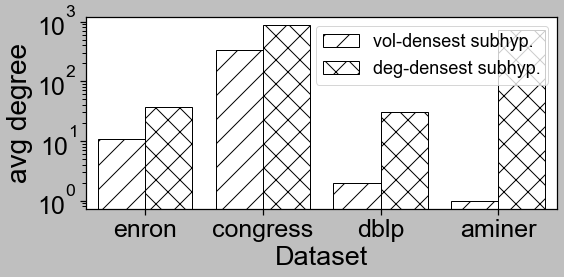

<Figure size 576x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import itertools
# print(plt.style.available)
sns.set(rc={'figure.figsize':(8,4)})
# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")
plt.style.use('grayscale')


save = False

good_name = {"volume density": "avg. #neighbors",  "degree density": "avg degree"}
include_algos = ["nbr", "deg"]
hatches = itertools.cycle(['/','X'])
colors = itertools.cycle(['0','0.8'])
# ord = [good_name_algo[i] for i in include_algos]
group_list = ['dataset']
include_datasets = ['enron','congress', 'dblp', 'aminer']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]

y_axis = 'volume density'
# c = '0.5'
c = '1'
ax = sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, order = include_datasets, color=c)
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    if i%len(include_datasets)==0:
        hatch = next(hatches)
    thisbar.set_hatch(hatch)
    thisbar.set_facecolor(c)

plt.xlabel('Dataset', fontsize=fontsize-1)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
ax.legend(loc='best',fontsize = labelsize-2)
plt.tight_layout()
if save:
    plt.savefig("../fig/avg_nbrs.pdf")
plt.show()
plt.clf()

y_axis = 'degree density'
c = '1'
ax = sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, order = include_datasets, color=c)
for i,thisbar in enumerate(ax.patches):
    # Set a different hatch for each bar
    if i%len(include_datasets)==0:
        hatch = next(hatches)
    thisbar.set_hatch(hatch)
    thisbar.set_facecolor(c)
plt.xlabel('Dataset', fontsize=fontsize-1)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=fontsize-3)
plt.yticks(fontsize=fontsize-3)
ax.legend(loc = 'best',fontsize=labelsize-2)
plt.tight_layout()
if save:
    plt.savefig("../fig/avg_deg.pdf")
plt.show()
plt.clf()